<a href="https://colab.research.google.com/github/akrambchiri123/deep-learning-coursera/blob/master/machine_learning_sar_tutorial_1_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

**Question 1.** Load the first data set located in ${\tt td\_1\_data\_set\_1\_X.csv}$ and ${\tt td\_1\_data\_set\_1\_Y.csv}$ and visualize it.

In [13]:
#Load data set 1
X = np.loadtxt(open("machine_learning_sar_tutorial_1_data_set_1_X.csv", "rb"), delimiter=",", skiprows=0)
Y = np.loadtxt(open("machine_learning_sar_tutorial_1_data_set_1_Y.csv", "rb"), delimiter=",", skiprows=0)
#Display the first 10 data points

for s in range(0,10):
    print('Example ', s ,' : ', X[s])
    print('Label ', s ,' : ', Y[s])

Example  0  :  [ 1.6302   0.1236   1.0486  -2.5934   0.52915]
Label  0  :  1.0
Example  1  :  [ 0.48889  -0.086267 -0.95551   0.37085   0.36009 ]
Label  1  :  -1.0
Example  2  :  [ 1.0347  -0.08058  1.1108  -0.34862 -0.14144]
Label  2  :  1.0
Example  3  :  [ 0.72689 -0.41526  0.64704 -0.82162 -1.2841 ]
Label  3  :  1.0
Example  4  :  [-0.30344 -0.48195  0.6892   0.92909  0.64574]
Label  4  :  -1.0
Example  5  :  [ 0.29387   0.14733   0.82444  -0.023135  0.14593 ]
Label  5  :  1.0
Example  6  :  [-0.78728  0.30853 -1.504   -0.39958 -1.5664 ]
Label  6  :  1.0
Example  7  :  [ 0.8884  -0.95941  0.45263 -1.1902   0.77326]
Label  7  :  1.0
Example  8  :  [-1.1471   0.95293  0.43819 -1.7452  -1.013  ]
Label  8  :  1.0
Example  9  :  [-1.0689  -1.4003   0.66742  0.86717 -2.0899 ]
Label  9  :  -1.0


**Question 2.** Compute the error rate of an arbitrary linear classifier. Fill out the ${\tt get\_error}$ function.

In [15]:
def get_error(X,Y,w):
    '''Compute the error of a classifier on a data set
 
    Arguments
    X: examples in the data set
    Y: labels of examples in the data set
    w: classifier
 
    Return value
    err: error rate of the classifier on the data set
    '''
 
    err = 0.0
    for i in range(0,Y.shape[0]):
        err = err + float(Y[i]*np.dot(X[i,:],w) <= 0)/Y.shape[0]
    return err

In [16]:
#Compute the error rate of a well chosen classifier
w = [1,1,0,-3,-1]
t = get_error(X,Y,w)
print('Classifier ', w/np.linalg.norm(w) ,' \nError ', t)

Classifier  [ 0.28867513  0.28867513  0.         -0.8660254  -0.28867513]  
Error  0.15515515515515554


**Question 3.** Run the variant of the perceptron algorithm described below on the data set for $T$ iterations for $T=10,100,1000,10000$ steps over $m=100$ examples. Report the outputted classifier and its training error. Fill out the ${\tt perceptron}$ function.

***

**Algorithm** Fast Perceptron  
**Data** Examples $S = (x_1,y_1,...,x_m,y_m)$, number of iterations $T$  
**Result** A separating hyperplane  
$w(0) \leftarrow 0$  
**For** $t=1,...,T$ **do**  
&emsp; Choose $i\in \{1,...,m\}$ uniformly at random  
&emsp; **If** $y_i w(t)^\top x_i \le 0$ **do**  
&emsp; &emsp; $w(t+1) \leftarrow w(t) + y_i x_i$  
**End**  

***


In [17]:
def perceptron(X,Y,T):
    '''Run the perceptron algorithm on a data set
 
    Arguments:
    X: examples in the training set
    Y: labels of examples in the training set
    T: Maximal number of iterations
 
    Return value
    w: the classifier found after at most T iteration of the algorithm
    '''
 
    w = np.zeros(X.shape[1]) #initial classifier is the null vector
    m = X.shape[0] #number of training examples
    for t in range(0,T):
        i = np.random.randint(0,m) #select an example at random
        if (Y[i]*np.dot(X[i,:],w) <= 0):
            w = w + Y[i]*X[i,:] #if the chosen example is incorrectly classified, add it to the current classifier
 
    return w


In [18]:
#Run the perceptron algorithm for T iterations
T = 100000 #number of iterations
w = perceptron(X,Y,T)
#Compute the error rate of the resulting classifier
t = get_error(X,Y,w)
print('Classifier ', w/np.linalg.norm(w) ,'\nError ', t)

Classifier  [ 0.47612956  0.25453752  0.00500886 -0.57484923 -0.61484516] 
Error  0.005005005005005005


**Question 4.** Perform a cross validation by splitting the data set in two parts for $m = 100$ and $T=1000$. Report the training error and the validation error. Fill out the  ${\tt split}$ function.

In [19]:
def split(X,Y,m):
    '''Arguments:
 
    X: examples in the data set
    Y: labels of examples in the data set
    m: number of examples in the training set
 
    Return values
    X_train: examples in the training set
    Y_train: labels of examples in the training set
    X_eval: examples in the validation set
    Y_eval: labels of examples in the validation set
 
    '''
    #Split Data Set Into Training And Validation
    p = np.random.permutation(X.shape[0])
    train = p[0:m]
    eval = p[m:(X.shape[0])]
    if (X.ndim == 1):
        X_train = X[train]
        X_eval = X[eval]
    else:
        X_train = X[train,:]
        X_eval = X[eval,:]
 
    Y_train = Y[train]
    Y_eval = Y[eval]
 
    return X_train,Y_train,X_eval,Y_eval

In [20]:
#Split the data set to perform cross validation
m = 100 #number of examples in the training set
X_train,Y_train,X_eval,Y_eval = split(X,Y,m)
#Run the perceptron algorithm for T iterations
T = 100000 #number of iterations
w = perceptron(X_train,Y_train,T)
#Compute the training and validation error of the resulting classifier
t = get_error(X_train,Y_train,w)
v = get_error(X_eval,Y_eval,w)
print('Classifier ', w/np.linalg.norm(w) ,'\nTraining Error ', t, '\nValidation Error ',v)

Classifier  [ 0.49262918  0.21951337 -0.00072737 -0.57645947 -0.61386018] 
Training Error  0.0 
Validation Error  0.011123470522803115


**Question 5.** Now perform $100$ cross validations and average out to get the true validation error. What is the validation error for $m=50,100,200$ examples and $T$ suitably chosen ?

In [ ]:
T = 10000 #number of iterations
n = 100 #number of cross validations
t_mean = 0 #to store the average training error
v_mean = 0 #to store the average validation error
for s in range(0,n):
    #Split the data set to perform cross validation
    m = 100 #number of examples in the training set
    X_train,Y_train,X_eval,Y_eval = split(X,Y,m)
    #Run the perceptron algorithm for T iterations over N cross validations
    w = perceptron(X_train,Y_train,T)
    #Compute the training and validation error of the resulting classifier
    t = get_error(X_train,Y_train,w)
    v = get_error(X_eval,Y_eval,w)
    t_mean = ###FILL HERE 
    v_mean = ###FILL HERE

print('Average Training Error ', t_mean, '\nAverage Validation Error ',v_mean)

In [21]:
T = 10000 #number of iterations
n = 100 #number of cross validations
t_mean = 0 #to store the average training error
v_mean = 0 #to store the average validation error
for s in range(0,n):
    #Split the data set to perform cross validation
    m = 100 #number of examples in the training set
    X_train,Y_train,X_eval,Y_eval = split(X,Y,m)
    #Run the perceptron algorithm for T iterations over N cross validations
    w = perceptron(X_train,Y_train,T)
    #Compute the training and validation error of the resulting classifier
    t = get_error(X_train,Y_train,w)
    v = get_error(X_eval,Y_eval,w)
    t_mean = t_mean + t/n
    v_mean = v_mean + v/n
 
print('Average Training Error ', t_mean, '\nAverage Validation Error ',v_mean)

Average Training Error  0.0009 
Average Validation Error  0.025617352614015557


**Question 6.** Load the second data set located in "machine_learning_sar_tutorial_1_data_set_2_X.csv" and "machine_learning_sar_tutorial_1_data_set_2_Y.csv" and visualize it. Argue whether or not using linear classification is appropriate.

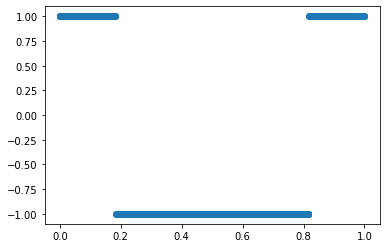

In [25]:
#Load data set 2
X = np.loadtxt(open("machine_learning_sar_tutorial_1_data_set_2_X.csv", "rb"), delimiter=",", skiprows=0)
Y = np.loadtxt(open("machine_learning_sar_tutorial_1_data_set_2_Y.csv", "rb"), delimiter=",", skiprows=0)
#Visualize data
plt.scatter(X,Y)
plt.show()

**Question 7.** We propose to use the following family of (non linear) polynomial predictors $h(x) = {\bf sign}( \sum_{i=0}^d w_i x^i)$. Propose a method to perform empirical risk minimization for this family of predictors, based on the perceptron algorithm. Perform the same steps as in question 5. Find a value for the dimension $d$ for which the validation error is low and interpret the result.

In [31]:
#transform the data using the polynomial mapping 
d = 4
X_poly = np.zeros([X.shape[0],d+1])
for i in range(0,X.shape[0]):
    X_poly[i,:] = ### FILL HERE
#learn on the transformed data
T = 10000 #number of iterations
n = 100 #number of cross validations
t_mean = 0 #to store the average training error
v_mean = 0 #to store the average validation error
for s in range(0,n):
    #Split the data set to perform cross validation
    m = 100 #number of examples in the training set
    X_train,Y_train,X_eval,Y_eval = split(X_poly,Y,m)
    #Run the perceptron algorithm for T iterations over N cross validations
    w = perceptron(X_train,Y_train,T)
    #Compute the training and validation error of the resulting classifier
    t = get_error(X_train,Y_train,w)
    v = get_error(X_eval,Y_eval,w)
    t_mean = t_mean + t/n
    v_mean = v_mean + v/n

print('Average Training Error ', t_mean, '\nAverage Validation Error ',v_mean)

SyntaxError: ignored

In [37]:
#transform the data using the polynomial mapping 
d = 5
X_poly = np.zeros([X.shape[0],d+1])
for i in range(0,X.shape[0]):
    X_poly[i,:] = np.power(X[i],list(range(d+1)))
#learn on the transformed data
T = 10000 #number of iterations
n = 100 #number of cross validations
t_mean = 0 #to store the average training error
v_mean = 0 #to store the average validation error
for s in range(0,n):
    #Split the data set to perform cross validation
    m = 100 #number of examples in the training set
    X_train,Y_train,X_eval,Y_eval = split(X_poly,Y,m)
    #Run the perceptron algorithm for T iterations over N cross validations
    w = perceptron(X_train,Y_train,T)
    #Compute the training and validation error of the resulting classifier
    t = get_error(X_train,Y_train,w)
    v = get_error(X_eval,Y_eval,w)
    t_mean = t_mean + t/n
    v_mean = v_mean + v/n
 
print('Average Training Error ', t_mean, '\nAverage Validation Error ',v_mean)

Average Training Error  0.0034000000000000002 
Average Validation Error  0.014077777777777772
